In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn

In [2]:
features_train = pd.read_csv(filepath_or_buffer='data/dengue_features_train.csv')
labels_train = pd.read_csv(filepath_or_buffer='data/dengue_labels_train.csv')

In [3]:
features_test = pd.read_csv(filepath_or_buffer='data/dengue_features_test.csv')

In [4]:
features_train.drop('week_start_date',axis=1,inplace=True)
features_test.drop('week_start_date',axis=1,inplace=True)

In [5]:
correlation_train = features_train.copy()

In [9]:
correlation_train['total_cases'] = labels_train['total_cases']
correlation_train['prev_total_cases'] = np.roll(labels_train['total_cases'], 1)

In [10]:
features_train.shape

(1456, 23)

In [11]:
correlation_train.shape

(1456, 25)

In [12]:
features_train_sj = features_train[features_train.city == 'sj'].drop('city',axis=1)
features_train_iq = features_train[features_train.city == 'iq'].drop('city',axis=1)

In [13]:
correlation_train_sj = correlation_train[correlation_train.city == 'sj'].drop('city',axis=1)
correlation_train_iq = correlation_train[correlation_train.city == 'iq'].drop('city',axis=1)

In [14]:
features_test_sj = features_test[features_test.city == 'sj'].drop('city',axis=1)
features_test_iq = features_test[features_test.city == 'iq'].drop('city',axis=1)

In [15]:
features_train_sj.shape

(936, 22)

In [16]:
correlation_train_sj.shape

(936, 24)

In [17]:
features_train_iq.shape

(520, 22)

In [18]:
features_train_sj.tail()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
931,2008,13,0.07785,-0.039900,0.310471,0.296243,27.19,296.958571,296.957143,292.095714,...,7.55,74.247143,27.19,13.644286,2.885714,25.042857,5.785714,30.0,21.1,1.8
932,2008,14,-0.03800,-0.016833,0.119371,0.066386,3.82,298.081429,298.228571,293.235714,...,3.67,74.600000,3.82,14.662857,2.714286,26.242857,6.814286,30.6,22.2,0.5
933,2008,15,-0.15520,-0.052750,0.137757,0.141214,16.96,297.460000,297.564286,292.732857,...,35.00,75.027143,16.96,14.184286,2.185714,25.000000,5.714286,29.4,21.7,30.7
934,2008,16,0.00180,NaN,0.203900,0.209843,0.00,297.630000,297.778571,292.274286,...,4.82,72.285714,0.00,13.858571,2.785714,25.314286,6.242857,29.4,21.7,11.2
935,2008,17,-0.03700,-0.010367,0.077314,0.090586,0.00,298.672857,298.692857,294.280000,...,2.17,76.960000,0.00,15.671429,3.957143,27.042857,7.514286,31.7,23.3,0.3


In [19]:
features_train_iq.tail()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
1451,2010,21,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,...,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,2010,22,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,...,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,2010,23,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,...,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,2010,24,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,...,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0
1455,2010,25,0.298186,0.232971,0.274214,0.315757,63.22,298.097143,299.835714,295.807143,...,36.90,89.082857,63.22,17.355714,11.014286,27.475000,9.900000,33.7,22.2,20.4


In [20]:
correlations_sj = correlation_train_sj.corr()
correlations_iq = correlation_train_iq.corr()

Text(0.5, 1.0, 'San Juan correlations')

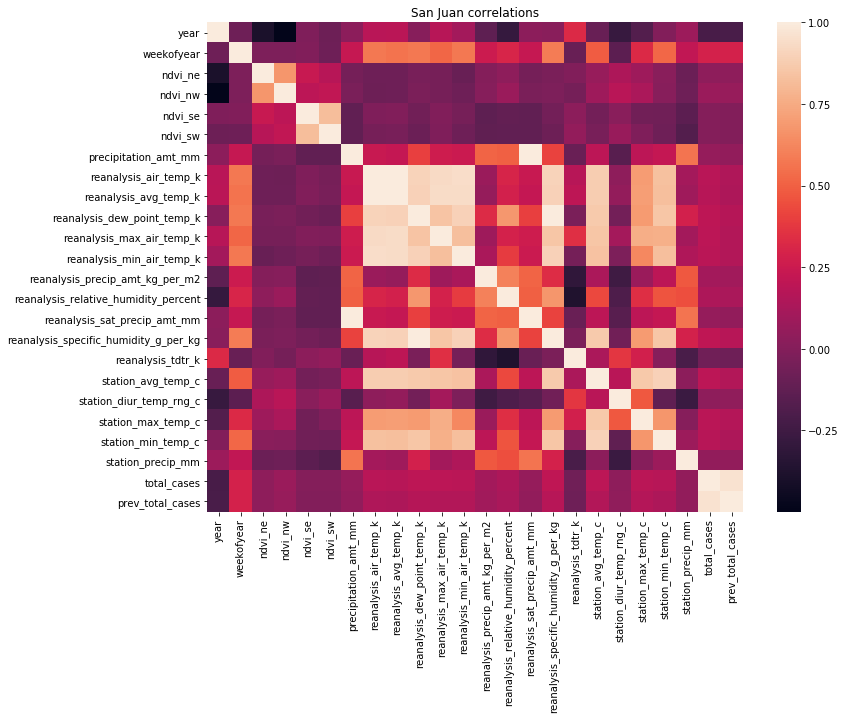

In [21]:
plt.figure(figsize=(12, 9))
correlations_sj_heatmap = seaborn.heatmap(correlations_sj)
plt.title('San Juan correlations')

Text(0.5, 1.0, 'Iquitos correlations')

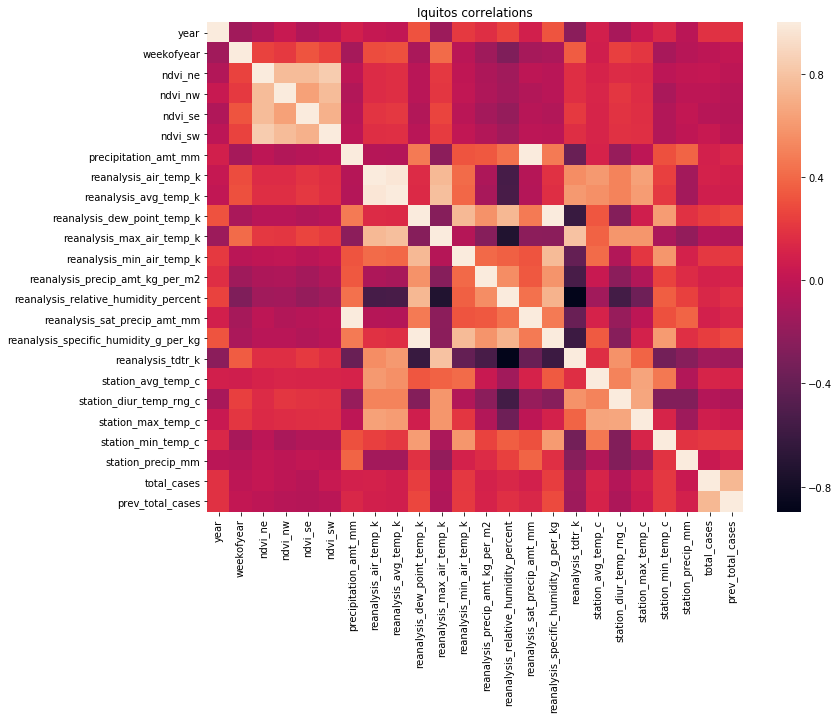

In [22]:
plt.figure(figsize=(12, 9))
correlations_iq_heatmap = seaborn.heatmap(correlations_iq)
plt.title('Iquitos correlations')